In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re

import wordcloud

In [2]:
## Define paths
DATA_FOLDER = './data/liar/'
DATA_PATH = DATA_FOLDER + 'train.tsv'

In [3]:
## Load raw data
cols = ["ID", "label", "statement", "subject", "speaker", "job", "state", "party", "barely_true_cts",
        "false_cts", "half_true_cts", "mostly_true_cts", "pants_on_fire_cts", "context"]
    
df_raw = pd.read_table(DATA_PATH, header=None)
df_raw.columns = cols

In [4]:
df_raw.statement = df_raw.statement.str.lower().apply(lambda x: re.sub(r'[^\w\s]',' ',x)).str.split()

words_list = df_raw.statement.sum()

label_lists = {}
lies = df_raw.groupby('label')
word_clouds = {}
for k,v in lies:
    label_lists[k] = v.statement.sum()
    word_clouds[k] = wordcloud.WordCloud(background_color="white", width=1700, height=500).generate(text=' '.join(label_lists[k]))

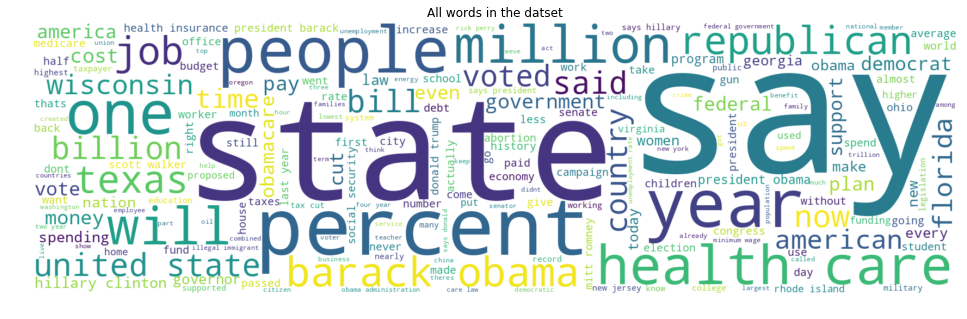

In [6]:
words_list = df_raw.statement.sum()

wc = wordcloud.WordCloud(background_color="white", width=1700, height=500).generate(text=' '.join(words_list))

plt.figure(figsize=(17,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('All words in the datset')
plt.show()

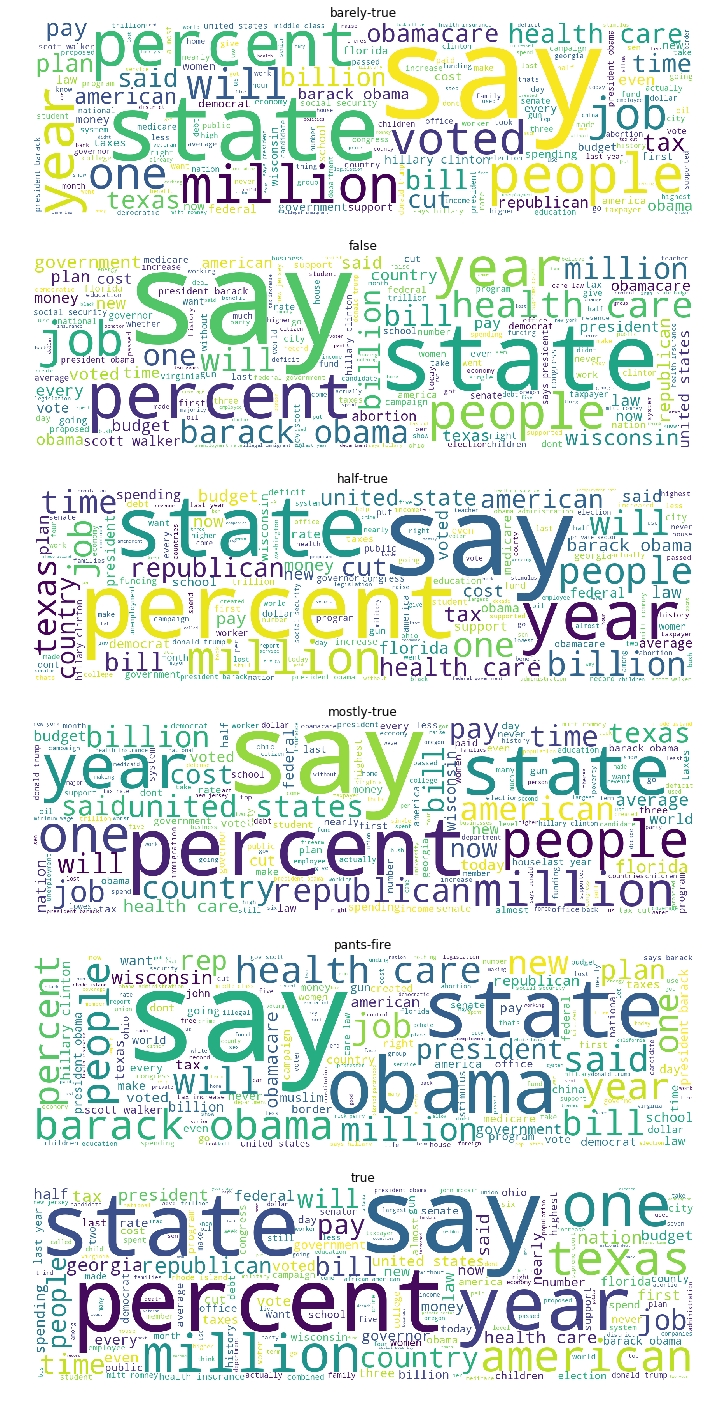

In [7]:
plt.figure(figsize=(17,25))

it = 1
for label, img in word_clouds.items():
    plt.subplot(len(word_clouds), 1, it)
    plt.imshow(img)
    plt.axis("off")
    plt.title(label)
    it+=1
plt.show()

Text(0.5,1,'truths')

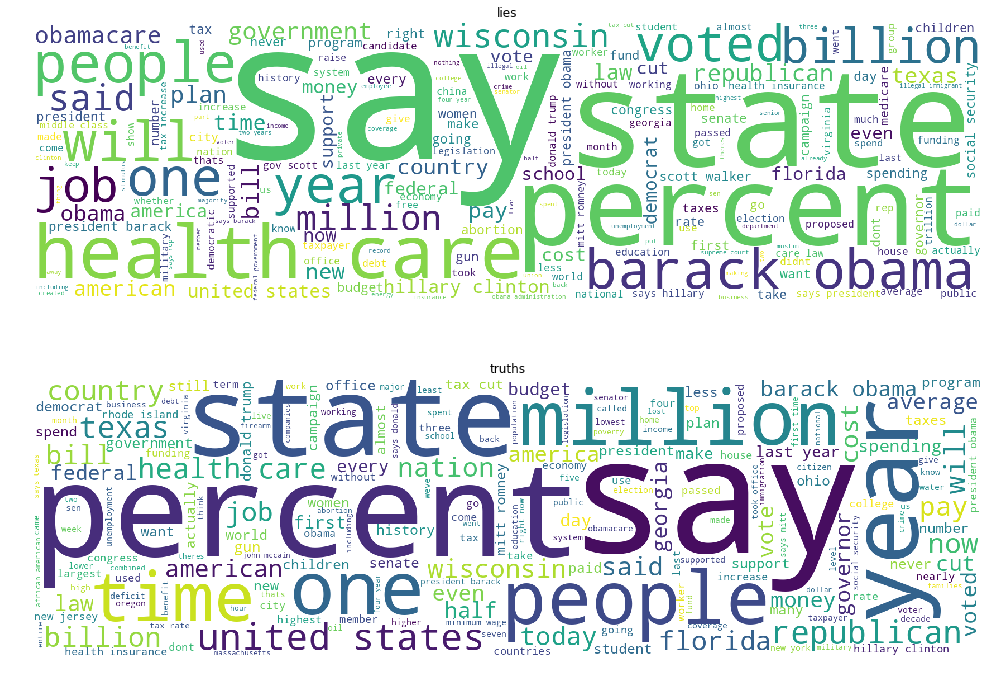

In [8]:
lies = label_lists['false'] + label_lists['pants-fire'] + label_lists['barely-true']
truths = label_lists['true'] + label_lists['mostly-true'] + label_lists['mostly-true']

lies_img = wordcloud.WordCloud(background_color="white", width=1700, height=500).generate(text=' '.join(lies))
truths_img = wordcloud.WordCloud(background_color="white", width=1700, height=500).generate(text=' '.join(truths))

plt.figure(figsize=(17,12))

plt.subplot(2, 1, 1)
plt.imshow(lies_img)
plt.axis("off")
plt.title('lies')

plt.subplot(2, 1, 2)
plt.imshow(truths_img)
plt.axis("off")
plt.title('truths')

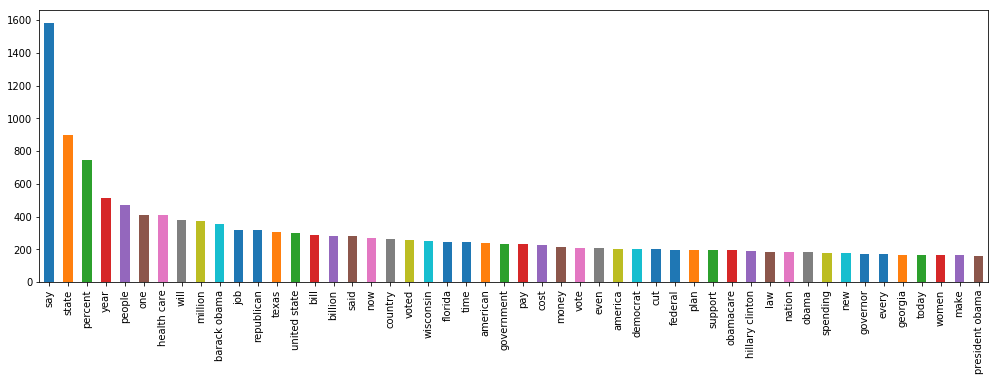

In [11]:
pd.Series(wordcloud.WordCloud().process_text(text=' '.join(words_list))).sort_values(ascending=False).iloc[:50].plot(kind='bar', figsize=(17,5))
plt.title('All')
plt.show()

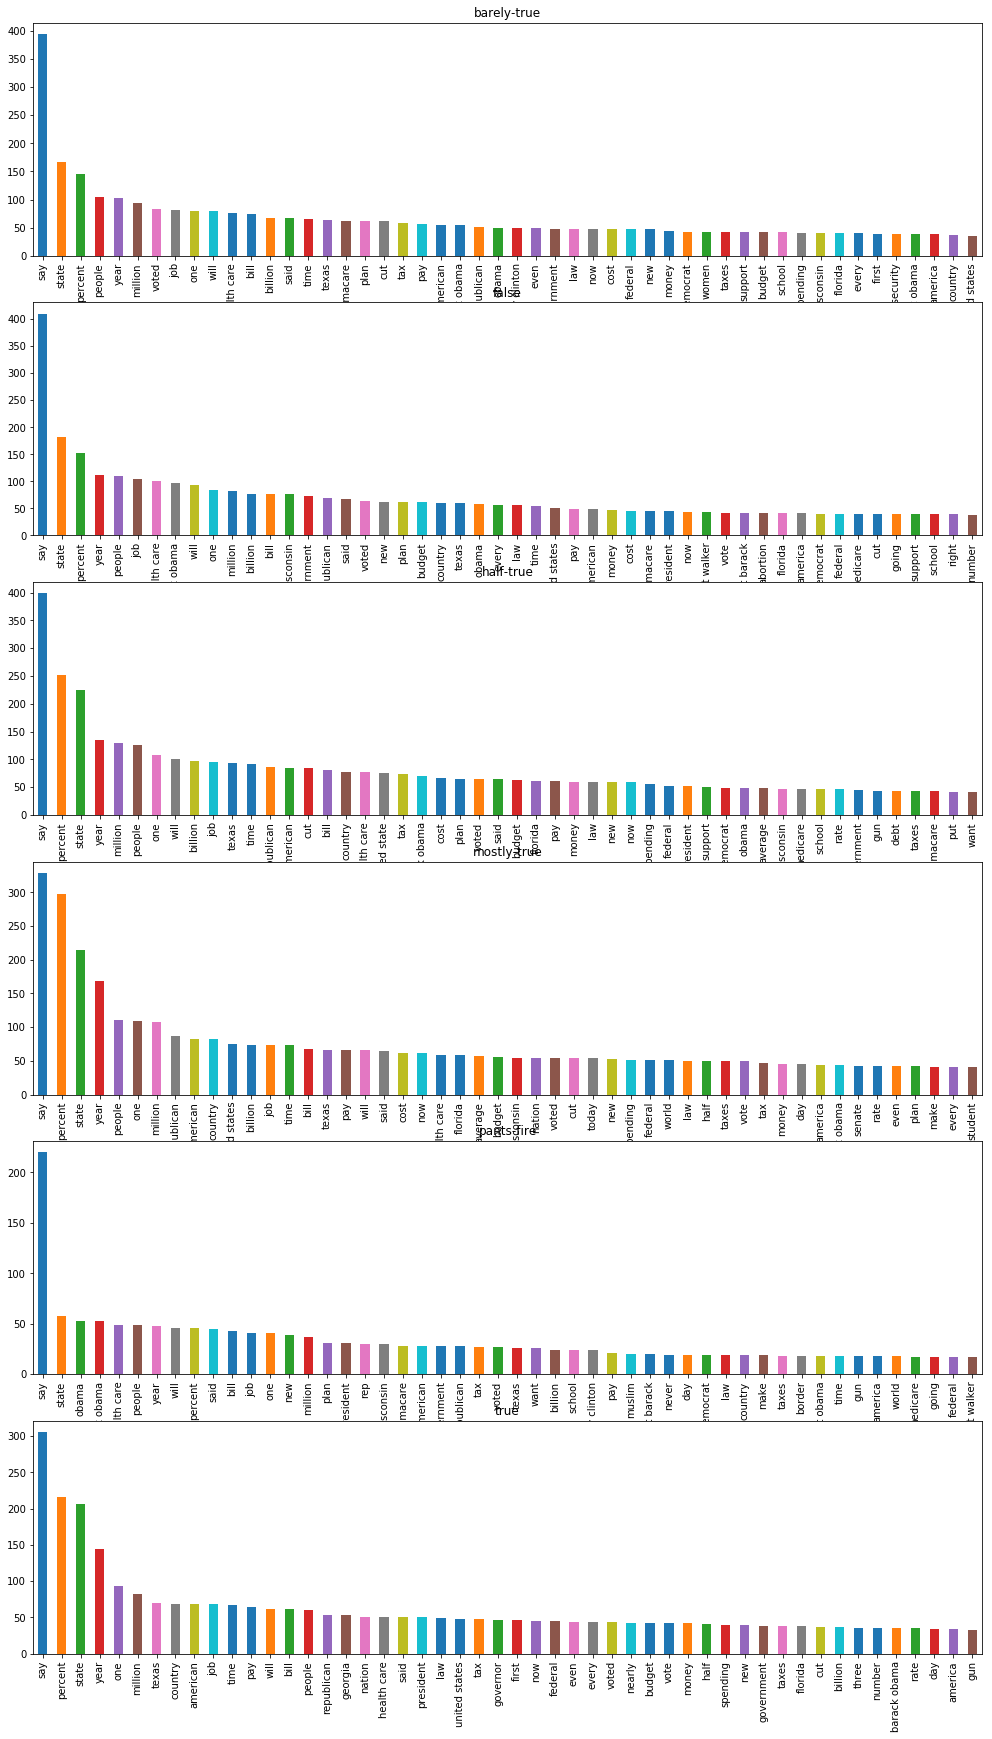

In [23]:
it = 1
plt.figure(figsize=(17,40))

for label, word_list in label_lists.items():
    plt.subplot(len(word_clouds), 1, it)
    pd.Series(wordcloud.WordCloud().process_text(text=' '.join(word_list))).sort_values(ascending=False).iloc[:50].plot(kind='bar', figsize=(17, 30))
    
    plt.title(label)
    it+=1
plt.show()

In [ ]:
label_lists.keys()

In [ ]:
a = pd.Series(words_list).value_counts()
x = a.iloc[:20]

plt.figure(figsize=(15,8))
sns.barplot(x=x.index, y=x.values)

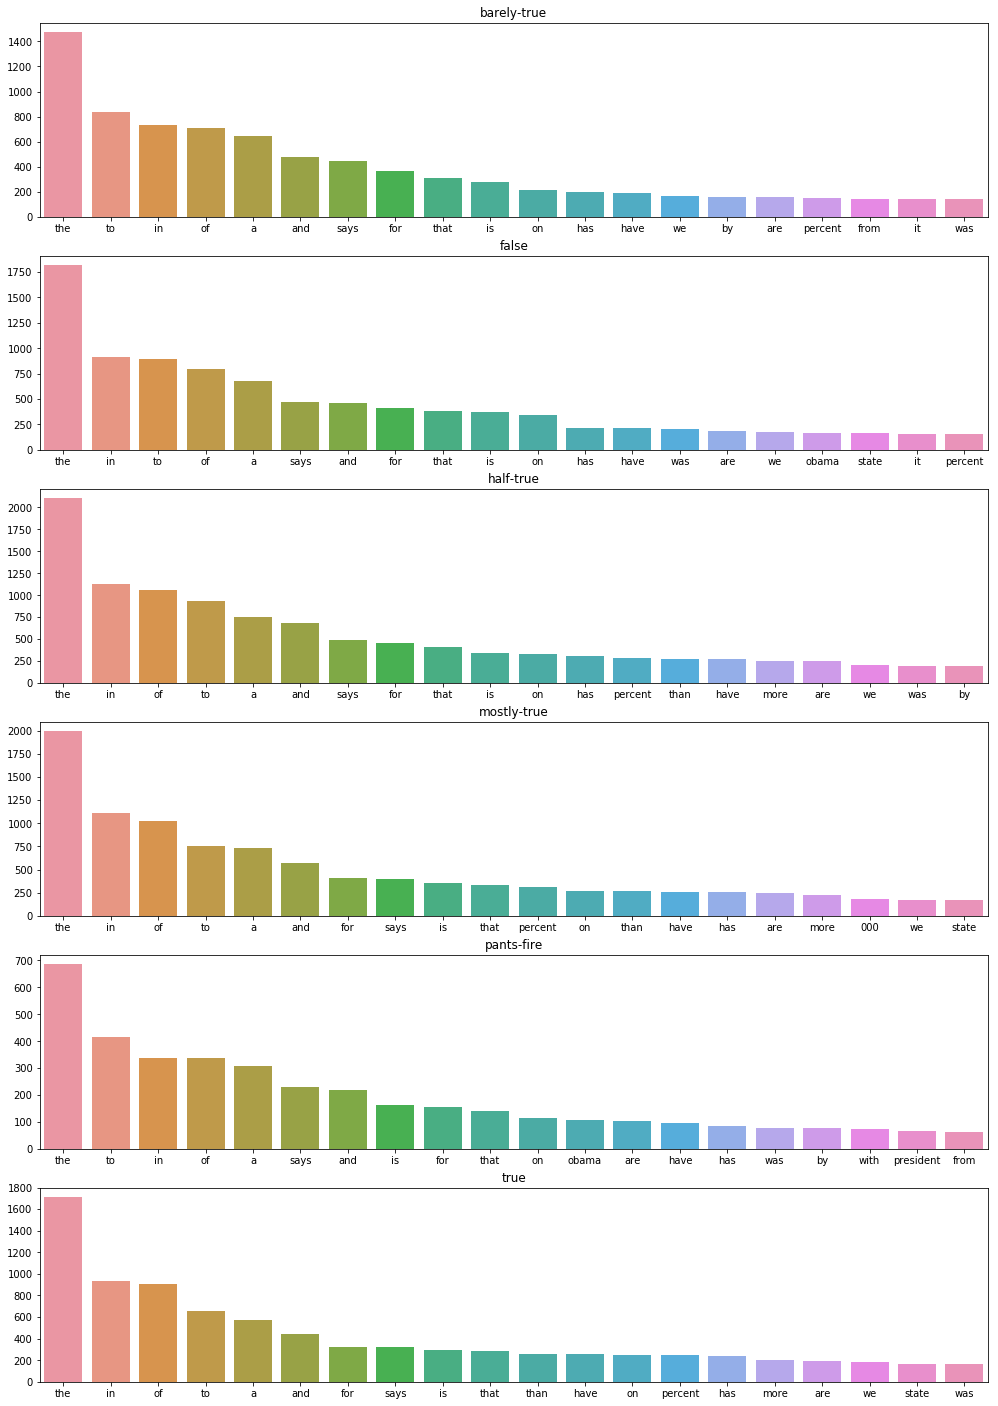

In [126]:
plt.figure(figsize=(17,25))

it = 1
for label, img in label_lists.items():
    
    a = pd.Series(img).value_counts().iloc[:20]
    plt.subplot(len(word_clouds), 1, it)
    sns.barplot(x=a.index, y=a.values)
    plt.title(label)
    it+=1
plt.show()

In [57]:
freq = pd.Series(df_raw.statement.sum()).value_counts()
x = freq.iloc[:20]

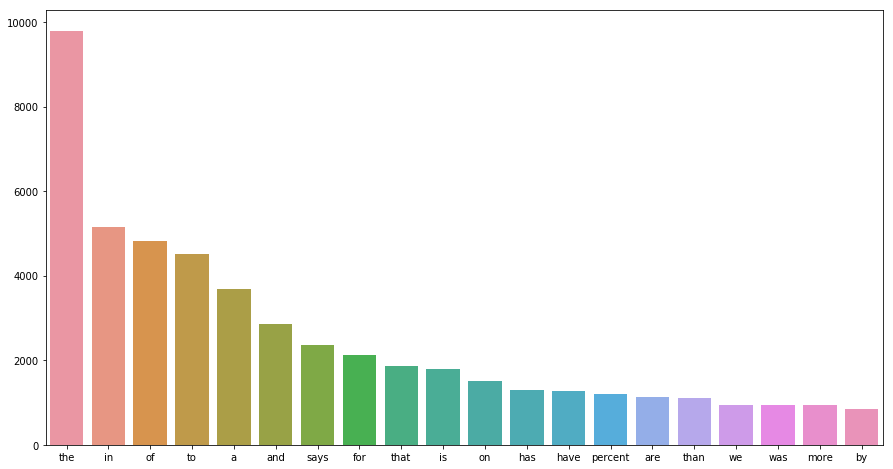

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(x=x.index, y=x.values)

In [26]:
pd.Series(x.statement.sum()).value_counts()

the               1713
in                 934
of                 908
to                 653
a                  577
and                442
for                324
says               321
is                 298
that               282
than               259
have               253
on                 250
percent            244
has                239
more               205
are                195
we                 185
state              164
was                161
s                  128
by                 126
from               123
he                 121
it                 119
years              118
our                114
with               108
year               105
tax                102
                  ... 
woodstock            1
moon                 1
serial               1
islander             1
assistance           1
exchange             1
tourist              1
communications       1
delta                1
grateful             1
heart                1
arkansas             1
romanians  